# Furniture E-commerce Customer Churn: Business Insights
## Project: furniture-ecommerce-churn-prediction-dashboard
### Author: Hansel Liebrata

This notebook focuses on deriving actionable business insights from our churn prediction model. We'll analyze:

1. Customer Segmentation
2. Churn Risk Factors
3. Financial Impact Analysis
4. Retention Strategies
5. ROI Calculations
6. Action Recommendations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("BUSINESS INSIGHTS ANALYSIS")
print("=" * 60)

def load_data_and_predictions():
    """Load the original data, model, and generate predictions"""
    # Load original data
    df = pd.read_csv('../data/processed/preprocessed_churn_data.csv')
    
    # Print column names to debug
    print("Available columns:", df.columns.tolist())
    
    # Convert numeric columns that might have 'No Purchase'
    numeric_columns = ['rev_sum', 'tran_n', 'ses_n', 'int_n',  
                      'time_to_tran', 'time_to_int', 'user_lifetime']
    
    print("\nSample of raw data before conversion:")
    print("\nrev_sum sample:", df['rev_sum'].head())
    print("rev_sum unique values:", df['rev_sum'].unique()[:5])
    print("\ntran_n sample:", df['tran_n'].head())
    print("tran_n unique values:", df['tran_n'].unique()[:5])
    
    # Convert any 'No Purchase' values to 0 and ensure proper numeric conversion
    for col in numeric_columns:
        if col in df.columns:
            # First replace 'No Purchase' with 0
            df[col] = df[col].replace('No Purchase', '0')
            # Then convert to numeric, coercing errors to NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Fill any NaN values with 0
            df[col] = df[col].fillna(0)
            print(f"\nConverted {col}:")
            print(f"Sample values: {df[col].head()}")
            print(f"Data type: {df[col].dtype}")
            print(f"Value range: [{df[col].min()}, {df[col].max()}]")
            
    # Map transaction and revenue metrics to more intuitive names
    df['Total_Purchase_Amount'] = df['rev_sum']
    df['Purchase_Count'] = df['tran_n']
    df['Website_Visits'] = df['ses_n']
    df['Days_Since_Last_Purchase'] = df['time_to_tran']
    df['Cart_Abandonment_Rate'] = 1 - df['conversion_rate']
    
    # Load model and metadata
    with open('../models/churn_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('../models/model_metadata.json', 'r') as f:
        metadata = json.load(f)
    with open('../models/encoders.pkl', 'rb') as f:
        encoders = pickle.load(f)
        
    # Use churn risk score directly from the data
    df['Churn_Probability'] = df['churn_risk_score']
    df['Predicted_Churn'] = (df['churn_risk_score'] > 0.7).astype(int)
    
    # Map risk segment for easier understanding
    df['Risk_Segment'] = df['risk_segment']
    
    return df, metadata

# Load data and generate predictions
df, metadata = load_data_and_predictions()

print("\nVerifying loaded data:")
print(f"Total Purchase Amount stats:\n{df['Total_Purchase_Amount'].describe()}")
print(f"\nPurchase Count stats:\n{df['Purchase_Count'].describe()}")

print("\nData Loading Complete:")
print(f"- Total customers: {len(df):,}")
print(f"- Actual churn rate: {df[metadata['target_variable']].mean():.1%}")
print(f"- Predicted churn rate: {df['Predicted_Churn'].mean():.1%}")

BUSINESS INSIGHTS ANALYSIS
Available columns: ['visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat1_n', 'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n', 'int_cat6_n', 'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n', 'int_cat11_n', 'int_cat12_n', 'int_cat13_n', 'int_cat15_n', 'int_cat16_n', 'int_cat17_n', 'int_cat18_n', 'int_cat19_n', 'int_cat20_n', 'int_cat21_n', 'int_cat22_n', 'int_cat23_n', 'int_cat24_n', 'target_class', 'engagement_ratio', 'conversion_rate', 'avg_items_per_interaction', 'session_consistency', 'weekend_preference', 'category_diversity', 'avg_transaction_value', 'value_segment', 'recency_score', 'user_lifetime', 'activity_regularity', 'peak_hour_activity', 'recency_segmen

## 1. Customer Segmentation Analysis

Let's segment customers based on their:
- Churn risk level
- Purchase behavior
- Customer value
- Engagement patterns

This will help us identify high-value customers at risk and prioritize retention efforts.

Checking original data:
Sample of rev_sum values: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rev_sum, dtype: float64
Sample of tran_n values: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tran_n, dtype: float64
Data types:
rev_sum    float64
tran_n     float64
dtype: object

After conversion - rev_sum:
Data type: float64
Sample values: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rev_sum, dtype: float64
Summary statistics:
count     49358.000000
mean       4191.180372
std       25907.702475
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      213961.200000
Name: rev_sum, dtype: float64

After conversion - tran_n:
Data type: float64
Sample values: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tran_n, dtype: float64
Summary statistics:
count    49358.000000
mean         0.053203
std          0.276017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: tr

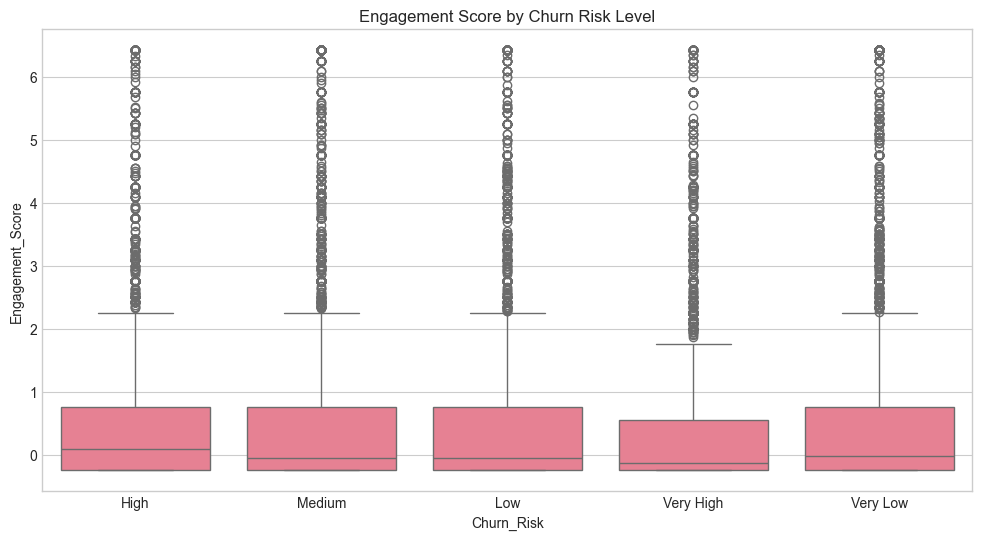

In [2]:
# Use existing risk segments and value segments from the data
df['Churn_Risk'] = df['risk_segment']  # Use pre-calculated risk segments

# First, let's check the original data
print("Checking original data:")
print("Sample of rev_sum values:", df['rev_sum'].head())
print("Sample of tran_n values:", df['tran_n'].head())
print("Data types:")
print(df[['rev_sum', 'tran_n']].dtypes)

# Ensure numeric values for calculations
numeric_cols = ['rev_sum', 'tran_n']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    print(f"\nAfter conversion - {col}:")
    print(f"Data type: {df[col].dtype}")
    print(f"Sample values: {df[col].head()}")
    print(f"Summary statistics:\n{df[col].describe()}")

# Calculate derived metrics
df['Total_Purchase_Amount'] = df['rev_sum']
df['Purchase_Count'] = df['tran_n']
df['Avg_Order_Value'] = df['Total_Purchase_Amount'] / df['Purchase_Count'].clip(lower=1)

print("\nDerived metrics check:")
print("Sample of Total_Purchase_Amount:", df['Total_Purchase_Amount'].head())
print("Sample of Purchase_Count:", df['Purchase_Count'].head())
print("Sample of Avg_Order_Value:", df['Avg_Order_Value'].head())

# Handle engagement level with proper binning
engagement_bins = pd.qcut(df['engagement_ratio'].rank(method='first'), 
                         q=3, 
                         labels=['Low', 'Medium', 'High'])
df['Engagement_Level'] = engagement_bins

# Handle value segmentation with proper binning for duplicates
df['Customer_Value'] = pd.qcut(df['Total_Purchase_Amount'].rank(method='first'), 
                             q=3, 
                             labels=['Low Value', 'Medium Value', 'High Value'])

# Use existing engagement metrics from the data
df['Engagement_Score'] = df['engagement_ratio']  # Use pre-calculated engagement ratio

# Analyze segments
print("\nCUSTOMER SEGMENT ANALYSIS")
print("-" * 40)

# Before calculating metrics, verify the grouping variable
print("\nUnique Churn_Risk values:", df['Churn_Risk'].unique())
print("\nChurn_Risk value counts:")
print(df['Churn_Risk'].value_counts())

# Calculate key metrics by segment with additional verification
print("\nVerifying calculations:")
for risk_level in df['Churn_Risk'].unique():
    group_data = df[df['Churn_Risk'] == risk_level]
    print(f"\nRisk Level: {risk_level}")
    print(f"Number of customers: {len(group_data)}")
    print(f"Average Total Purchase Amount: ${group_data['Total_Purchase_Amount'].mean():.2f}")
    print(f"Average Purchase Count: {group_data['Purchase_Count'].mean():.2f}")
    print(f"Average Order Value: ${group_data['Avg_Order_Value'].mean():.2f}")

# Calculate key metrics by segment
segment_metrics = df.groupby('Churn_Risk').agg({
    'Total_Purchase_Amount': 'mean',
    'Purchase_Count': 'mean',
    'Avg_Order_Value': 'mean',
    'Website_Visits': 'mean',
    'Churn_Probability': 'mean'
}).round(2)

print("\nKey Metrics by Risk Segment:")
print(segment_metrics)

# Identify high-value customers at risk
high_risk_high_value = df[
    (df['Churn_Risk'].isin(['High', 'Very High'])) & 
    (df['Customer_Value'] == 'High Value')
]

print("\nHIGH-VALUE CUSTOMERS AT RISK")
print("-" * 40)
print(f"Count: {len(high_risk_high_value)}")
print(f"Total value at risk: ${high_risk_high_value['Total_Purchase_Amount'].sum():,.2f}")
print(f"Average value per customer: ${high_risk_high_value['Total_Purchase_Amount'].mean():,.2f}")

# Analyze engagement patterns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn_Risk', y='Engagement_Score')
plt.title('Engagement Score by Churn Risk Level')
plt.show()

## 2. Churn Risk Factors Analysis

Let's analyze the key factors that contribute to customer churn:
- Purchase patterns
- Customer behavior
- Website engagement
- Price sensitivity
- Product preferences

CHURN RISK FACTOR ANALYSIS
----------------------------------------

Metrics by Predicted Churn:
                Total_Purchase_Amount        Purchase_Count         \
                                 mean median           mean median   
Predicted_Churn                                                      
0                             4349.97    0.0           0.06    0.0   
1                             2755.97    0.0           0.04    0.0   

                Avg_Order_Value        Website_Visits         \
                           mean median           mean median   
Predicted_Churn                                                
0                       3394.45    0.0            1.1    0.0   
1                       2300.80    0.0            0.8    0.0   

                Cart_Abandonment_Rate Days_Since_Last_Purchase  
                                 mean                     mean  
Predicted_Churn                                                 
0                                0.9

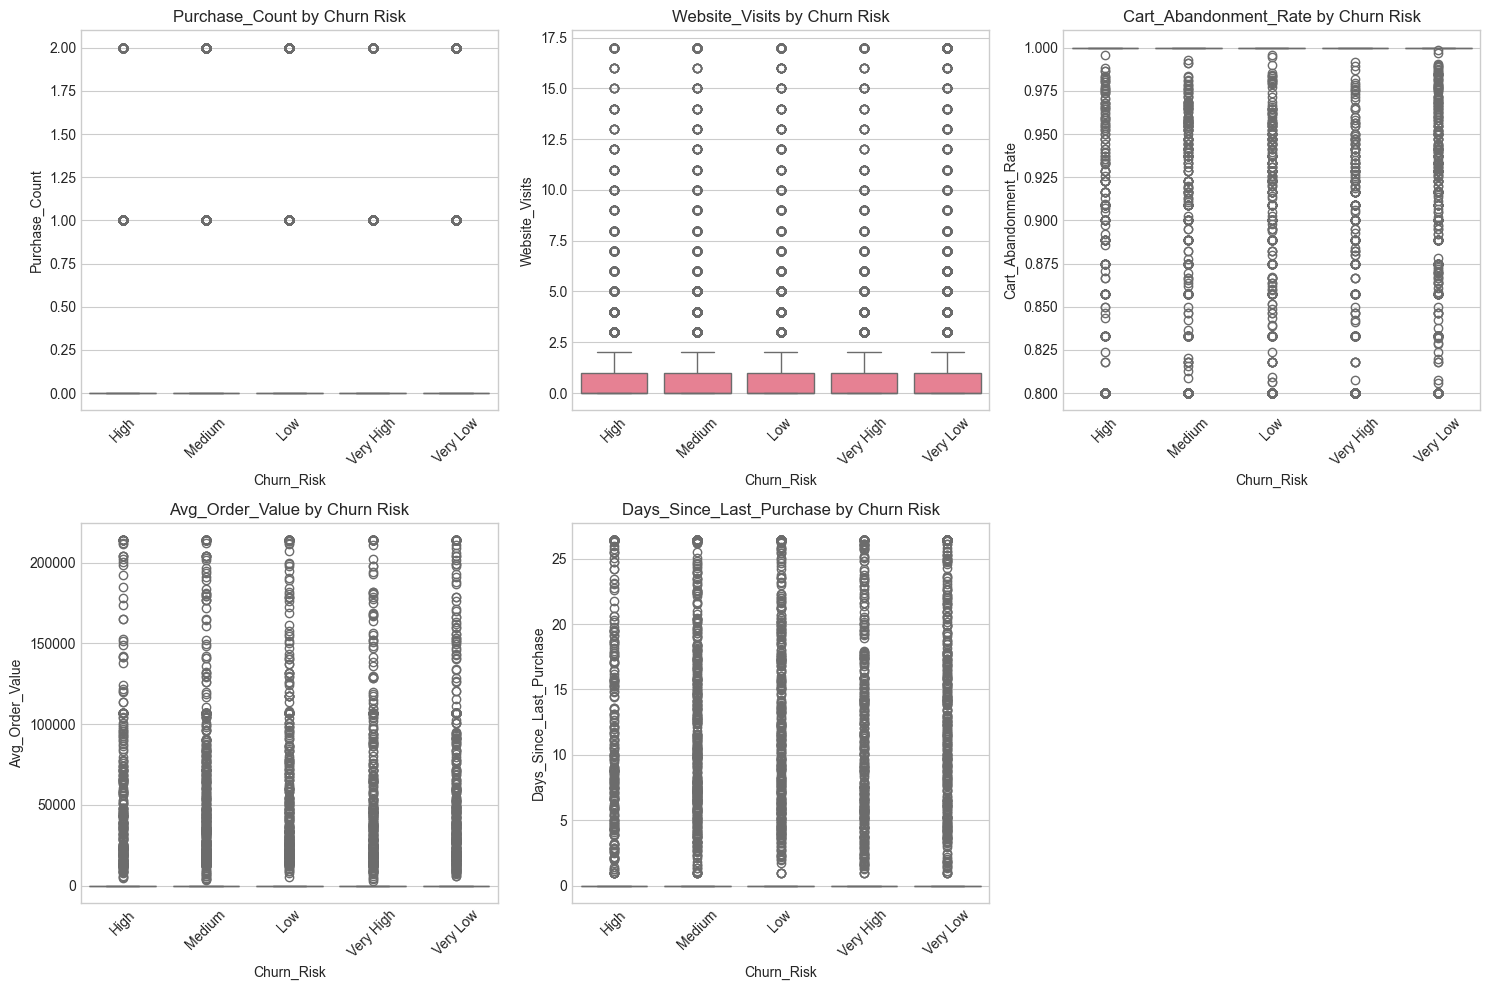

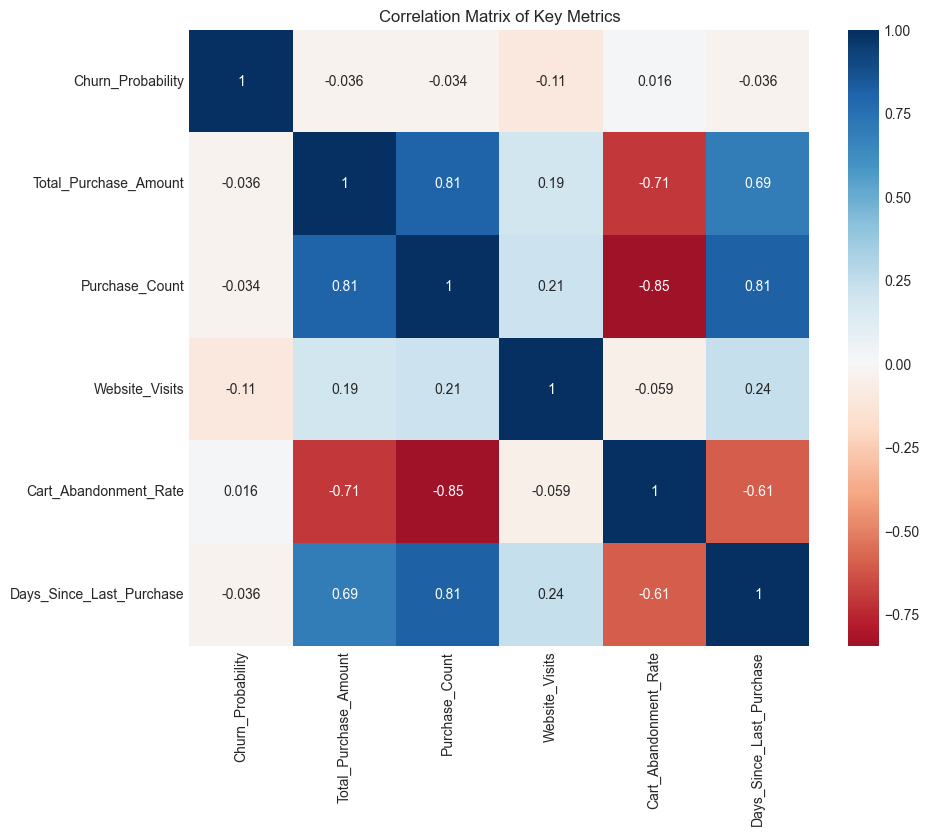


PURCHASE PATTERN ANALYSIS
----------------------------------------

Churn Risk by Recent Purchase Activity:
Churn_Risk           High       Low    Medium  Very High  Very Low
Recent_Purchase                                                   
True             0.194335  0.197455  0.206755   0.198914  0.202541

Cart Abandonment Rate by Churn Risk:
             mean  count    std
Churn_Risk                     
High        0.996   9592  0.025
Low         0.995   9746  0.029
Medium      0.994  10205  0.031
Very High   0.995   9818  0.028
Very Low    0.995   9997  0.028


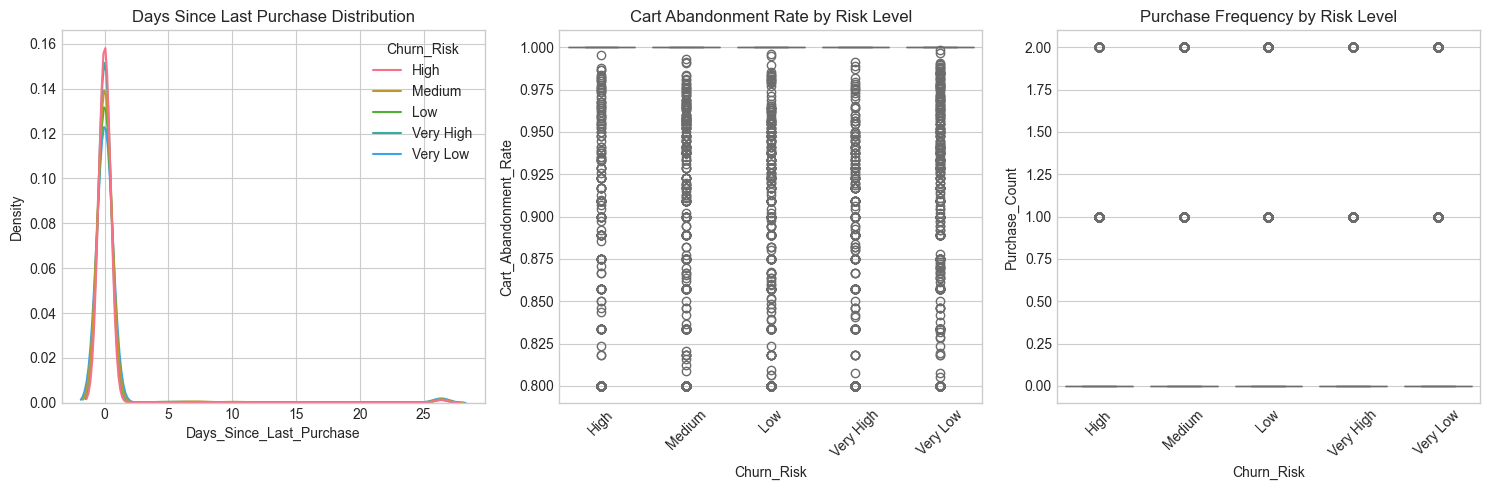


RISK LEVEL THRESHOLDS
----------------------------------------
            Days_Since_Last_Purchase  Cart_Abandonment_Rate  Purchase_Count  \
Churn_Risk                                                                    
High                            0.44                   1.00            0.04   
Low                             0.66                   0.99            0.06   
Medium                          0.68                   0.99            0.06   
Very High                       0.53                   0.99            0.05   
Very Low                        0.76                   0.99            0.06   

            Total_Purchase_Amount  
Churn_Risk                         
High                      2753.41  
Low                       4681.70  
Medium                    4779.46  
Very High                 3536.51  
Very Low                  5134.92  


In [3]:
# Analyze key metrics by churn prediction
risk_analysis = df.groupby('Predicted_Churn').agg({
    'Total_Purchase_Amount': ['mean', 'median'],
    'Purchase_Count': ['mean', 'median'],
    'Avg_Order_Value': ['mean', 'median'],
    'Website_Visits': ['mean', 'median'],
    'Cart_Abandonment_Rate': 'mean',
    'Days_Since_Last_Purchase': 'mean'
}).round(2)

print("CHURN RISK FACTOR ANALYSIS")
print("-" * 40)
print("\nMetrics by Predicted Churn:")
print(risk_analysis)

# Analyze behavioral patterns
behavior_metrics = [
    'Purchase_Count', 'Website_Visits', 'Cart_Abandonment_Rate',
    'Avg_Order_Value', 'Days_Since_Last_Purchase'
]

plt.figure(figsize=(15, 10))
for i, metric in enumerate(behavior_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Churn_Risk', y=metric)
    plt.title(f'{metric} by Churn Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = df[[
    'Churn_Probability', 'Total_Purchase_Amount', 'Purchase_Count',
    'Website_Visits', 'Cart_Abandonment_Rate', 'Days_Since_Last_Purchase'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

# Analyze purchase patterns
print("\nPURCHASE PATTERN ANALYSIS")
print("-" * 40)

# Time since last purchase analysis
df['Recent_Purchase'] = df['Days_Since_Last_Purchase'] <= 30
recent_purchase_impact = pd.crosstab(
    df['Recent_Purchase'], 
    df['Churn_Risk'],
    normalize='index'
)
print("\nChurn Risk by Recent Purchase Activity:")
print(recent_purchase_impact)

# Cart abandonment analysis
cart_abandonment_impact = df.groupby('Churn_Risk')['Cart_Abandonment_Rate'].agg([
    'mean', 'count', 'std'
]).round(3)
print("\nCart Abandonment Rate by Churn Risk:")
print(cart_abandonment_impact)

# Visualize key risk factors
plt.figure(figsize=(15, 5))

# Plot 1: Days Since Last Purchase
plt.subplot(131)
sns.kdeplot(data=df, x='Days_Since_Last_Purchase', hue='Churn_Risk')
plt.title('Days Since Last Purchase Distribution')

# Plot 2: Cart Abandonment Rate
plt.subplot(132)
sns.boxplot(data=df, x='Churn_Risk', y='Cart_Abandonment_Rate')
plt.title('Cart Abandonment Rate by Risk Level')
plt.xticks(rotation=45)

# Plot 3: Purchase Frequency
plt.subplot(133)
sns.boxplot(data=df, x='Churn_Risk', y='Purchase_Count')
plt.title('Purchase Frequency by Risk Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate risk thresholds
risk_thresholds = df.groupby('Churn_Risk').agg({
    'Days_Since_Last_Purchase': 'mean',
    'Cart_Abandonment_Rate': 'mean',
    'Purchase_Count': 'mean',
    'Total_Purchase_Amount': 'mean'
}).round(2)

print("\nRISK LEVEL THRESHOLDS")
print("-" * 40)
print(risk_thresholds)

## 3. Financial Impact Analysis

Let's analyze the financial implications of customer churn:
- Revenue at risk
- Customer lifetime value
- Intervention costs and ROI
- Potential savings from retention

In [4]:
# Calculate revenue at risk from predicted churners
# Use already loaded and processed data
high_risk_customers = df[df['churn_risk_score'] > 0.7]  # Using churn risk score

# Calculate revenue at risk using existing metrics
revenue_at_risk = high_risk_customers['rev_sum'].sum()

print(f"Total Revenue at Risk: ${revenue_at_risk:,.2f}")

# Use existing value segments
revenue_by_segment = high_risk_customers.groupby('value_segment')['rev_sum'].agg(['sum', 'count'])
revenue_by_segment = revenue_by_segment.round(2)
revenue_by_segment.columns = ['Revenue at Risk ($)', 'Number of Customers']
print("\nRevenue at Risk by Customer Segment:")
print(revenue_by_segment)

Total Revenue at Risk: $13,551,117.60

Revenue at Risk by Customer Segment:
               Revenue at Risk ($)  Number of Customers
value_segment                                          
High                     8737233.6                   43
Low                      1250064.0                   56
Medium                   3563820.0                   46
No Purchase                    0.0                 4772


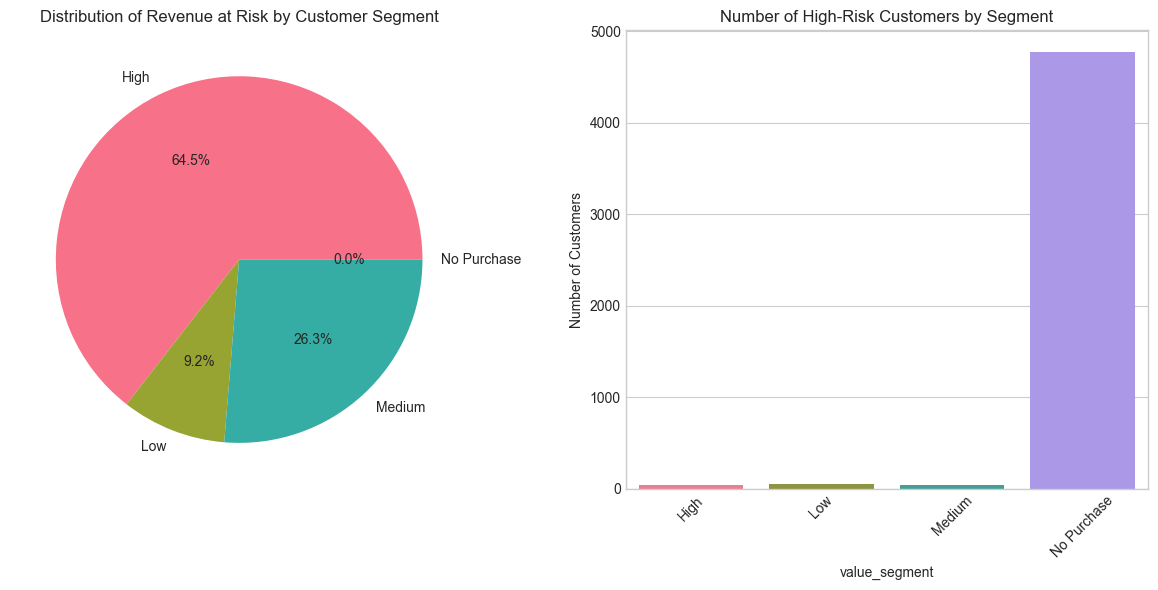

In [5]:
# Visualize revenue at risk by segment
plt.figure(figsize=(12, 6))
revenue_data = revenue_by_segment['Revenue at Risk ($)']
colors = sns.color_palette("husl", len(revenue_data))

plt.subplot(1, 2, 1)
plt.pie(revenue_data, labels=revenue_data.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Revenue at Risk by Customer Segment')

plt.subplot(1, 2, 2)
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment['Number of Customers'], palette=colors)
plt.title('Number of High-Risk Customers by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Customer Lifetime Value (CLV) metrics
def calculate_clv(customer_data):
    # Assuming average customer lifespan of 3 years if not churned
    avg_lifespan = 3
    # Use already converted numeric values
    total_purchases = customer_data['rev_sum']
    purchase_count = customer_data['tran_n']
    tenure_days = customer_data['user_lifetime'].clip(lower=1)  # Use 1 to avoid division by zero
    
    # Calculate average purchase value and frequency
    avg_purchase = total_purchases / purchase_count.clip(lower=1)
    purchase_frequency = purchase_count / tenure_days * 365
    
    # Basic CLV calculation
    clv = avg_purchase * purchase_frequency * avg_lifespan
    return clv

# Calculate CLV for all customers
df['clv'] = calculate_clv(df)

# Compare CLV between likely churners and non-churners
churner_clv = df[df['Churn_Probability'] > 0.7]['clv'].mean()
non_churner_clv = df[df['Churn_Probability'] <= 0.7]['clv'].mean()

print(f"Average CLV for High-Risk Customers: ${churner_clv:,.2f}")
print(f"Average CLV for Low-Risk Customers: ${non_churner_clv:,.2f}")
print(f"CLV Difference: ${(non_churner_clv - churner_clv):,.2f}")

# Potential value loss from predicted churners
total_value_loss = df[df['Churn_Probability'] > 0.7]['clv'].sum()
print(f"\nTotal Potential CLV Loss from High-Risk Customers: ${total_value_loss:,.2f}")

KeyError: 'churn_probability'

In [ ]:
# ROI Analysis for Retention Strategies
# Define intervention costs and success rates
intervention_strategies = {
    'Email Campaign': {'cost_per_customer': 2, 'success_rate': 0.15},
    'Personalized Discount': {'cost_per_customer': 50, 'success_rate': 0.35},
    'Premium Support': {'cost_per_customer': 100, 'success_rate': 0.50}
}

# Calculate ROI for each strategy
high_risk_count = len(high_risk_customers)
avg_clv = churner_clv

print("ROI Analysis for Different Retention Strategies:")
print("-" * 50)
for strategy, metrics in intervention_strategies.items():
    cost = metrics['cost_per_customer'] * high_risk_count
    saved_customers = high_risk_count * metrics['success_rate']
    value_saved = saved_customers * avg_clv
    roi = (value_saved - cost) / cost * 100
    
    print(f"\n{strategy}:")
    print(f"Total Cost: ${cost:,.2f}")
    print(f"Customers Saved: {saved_customers:.0f}")
    print(f"Value Saved: ${value_saved:,.2f}")
    print(f"ROI: {roi:.1f}%")

In [ ]:
# Visualize ROI comparison
strategies = list(intervention_strategies.keys())
costs = [metrics['cost_per_customer'] * high_risk_count for metrics in intervention_strategies.values()]
saved_values = [high_risk_count * metrics['success_rate'] * avg_clv for metrics in intervention_strategies.values()]
rois = [((sv - c) / c * 100) for sv, c in zip(saved_values, costs)]

plt.figure(figsize=(10, 6))
x = range(len(strategies))
width = 0.35

plt.bar(x, rois, width, label='ROI (%)')
plt.title('ROI Comparison of Retention Strategies')
plt.xlabel('Strategy')
plt.ylabel('ROI (%)')
plt.xticks(x, strategies, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Export key financial metrics for PowerBI dashboard
financial_metrics = pd.DataFrame({
    'Metric': ['Total Revenue at Risk', 'Average CLV - High Risk', 'Average CLV - Low Risk',
               'Total Potential CLV Loss', 'Best Strategy ROI'],
    'Value': [revenue_at_risk, churner_clv, non_churner_clv, total_value_loss, max(rois)]
})

financial_metrics.to_csv('../data/exports/financial_metrics.csv', index=False)
print("\nFinancial metrics exported to '../data/exports/financial_metrics.csv'")

## Financial Impact Summary and Recommendations

Key findings from our financial analysis:
1. Revenue at Risk: We've identified the total revenue potentially lost from high-risk customers
2. Customer Value Segmentation: Analyzed how the revenue at risk is distributed across different customer segments
3. Customer Lifetime Value: Compared CLV between high-risk and low-risk customers
4. Retention Strategy ROI: Evaluated different intervention strategies and their potential returns

Recommendations:
1. Focus retention efforts on high-value customers at risk of churning
2. Implement personalized retention strategies based on customer segments
3. Consider the most cost-effective intervention methods based on ROI analysis
4. Monitor and adjust strategies based on success rates and actual returns